In [1]:
from sequenzo import *
import pandas as pd

In [5]:
# ------------------------
# Step 0: 定义提取工具函数
# ------------------------

def extract_state_space(sequences):
    return sorted(set(s for seq in sequences for s in seq))

# ------------------------
# Step 1: 读取和准备数据
# ------------------------

df = pd.read_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_sequence_10_work_years_df.csv")

time_cols = [f"C{i}" for i in range(1, 11)]  # C1~C10

# 假设 'country' 是一列，值为 'India' 或 'US'
india_df = df[df["country"] == "india"].copy()
us_df = df[df["country"] == "us"].copy()

T = len(time_cols)  # 一般是固定 10
india_states = extract_state_space(india_sequences)
us_states = extract_state_space(us_sequences)

# 提取 sequence 列
india_sequences = extract_sequences(india_df, time_cols)
us_sequences = extract_sequences(us_df, time_cols)

# ------------------------
# Step 2: 构建前缀树
# ------------------------

india_tree = build_prefix_tree(india_sequences)
us_tree = build_prefix_tree(us_sequences)

# 为每个国家分别建模
india_model = IndividualDivergence(india_sequences)
us_model = IndividualDivergence(us_sequences)

In [6]:
india_prefix_counts = compute_prefix_count(india_tree, T)
india_branching_factors = compute_branching_factor(india_tree, T)
india_js_scores = compute_js_divergence(india_sequences, state_set=india_states)
india_composite_score = compute_composite_score(india_prefix_counts, india_branching_factors, india_js_scores)

us_prefix_counts = compute_prefix_count(us_tree, T)
us_branching_factors = compute_branching_factor(us_tree, T)
us_js_scores = compute_js_divergence(us_sequences, state_set=us_states)
us_composite_score = compute_composite_score(us_prefix_counts, us_branching_factors, us_js_scores)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_system_indicators_comparison(
    T,
    india_data,
    us_data,
    save_as=None
):
    sns.set(style="whitegrid", font_scale=1.2)
    x = list(range(1, T + 1))

    fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    # 左图：India
    axs[0].plot(x, india_data["prefix_counts"], label="Prefix Count", color="tab:blue")
    axs[0].plot(x, india_data["branching_factors"], label="Branching Factor", color="tab:orange")
    axs[0].plot(x, india_data["js_scores"], label="JS Divergence", color="tab:green")
    axs[0].plot(x, india_data["composite_score"], label="Composite Score", color="black", linestyle="--")
    axs[0].set_title("India")
    axs[0].set_xlabel("Year (t)")
    axs[0].set_ylabel("Value")
    axs[0].legend()

    # 右图：US
    axs[1].plot(x, us_data["prefix_counts"], label="Prefix Count", color="tab:blue")
    axs[1].plot(x, us_data["branching_factors"], label="Branching Factor", color="tab:orange")
    axs[1].plot(x, us_data["js_scores"], label="JS Divergence", color="tab:green")
    axs[1].plot(x, us_data["composite_score"], label="Composite Score", color="black", linestyle="--")
    axs[1].set_title("United States")
    axs[1].set_xlabel("Year (t)")
    axs[1].legend()

    plt.suptitle("System-Level Indicators by Country", fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    if save_as:
        plt.savefig(f"{save_as}.png", dpi=300)
        plt.show()
    plt.show()


TODO
1. 实现 plot_system_indicators 可以分国家，上下有子图
2. xlabel，title

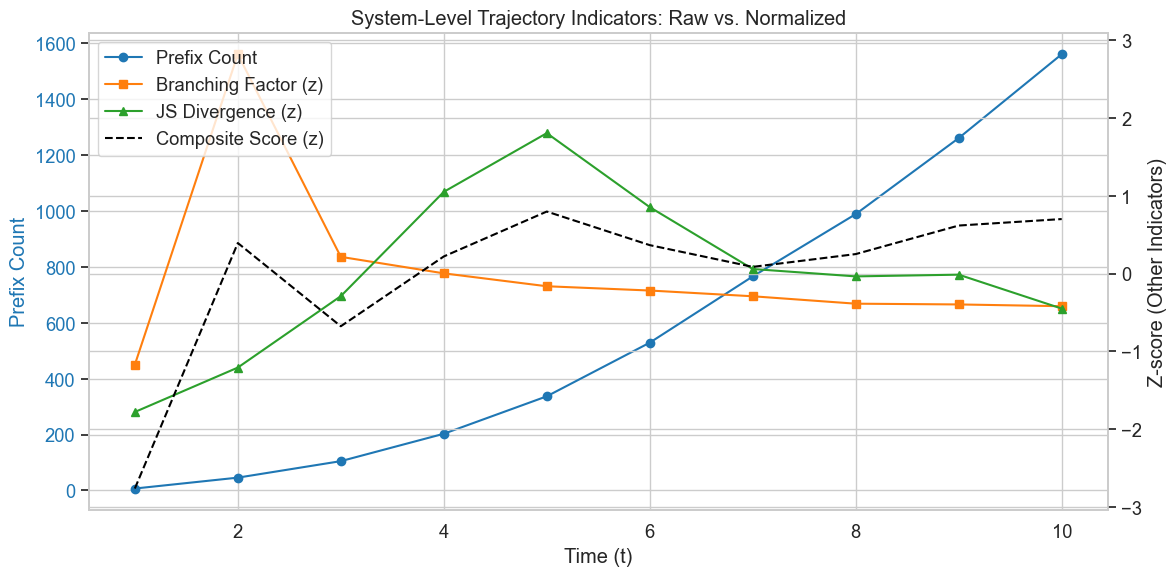

<Figure size 640x480 with 0 Axes>

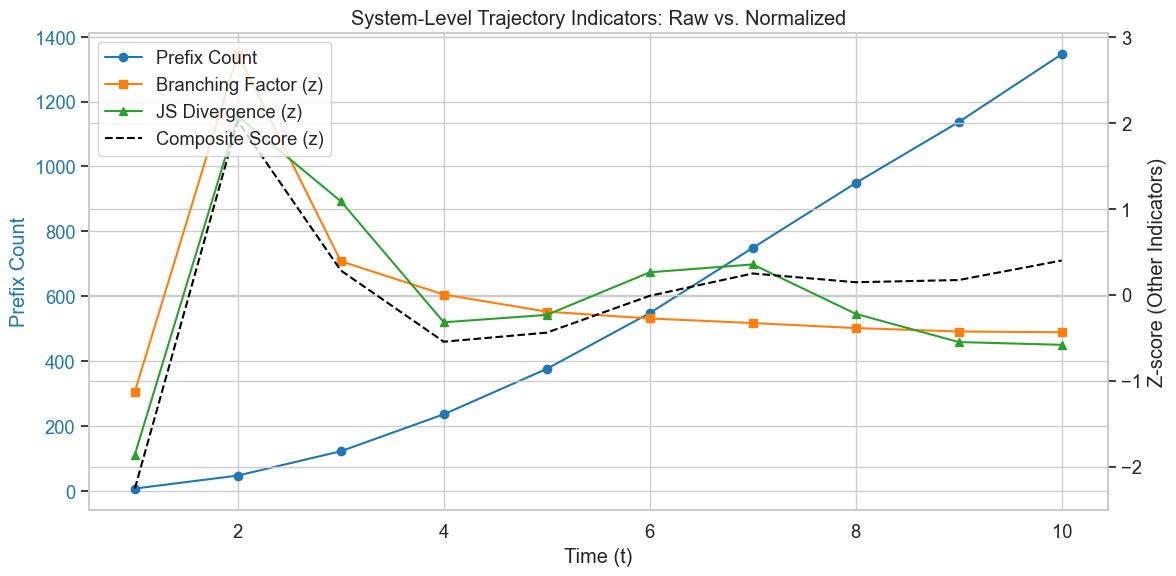

<Figure size 640x480 with 0 Axes>

In [10]:
plot_system_indicators(
    prefix_counts=india_prefix_counts,
    branching_factors=india_branching_factors,
    js_divergence=india_js_scores,
    composite_score=india_composite_score,
    save_as="system_indicators_india"
)

plot_system_indicators(
    prefix_counts=us_prefix_counts,
    branching_factors=us_branching_factors,
    js_divergence=us_js_scores,
    composite_score=us_composite_score,
    save_as="system_indicators_us"
)


In [11]:
# ------------------------
# Step 4: 计算个体层指标
# ------------------------

# 赋值回 dataframe
india_df["diverged"] = india_model.compute_diverged()
india_df["divergence_year"] = india_model.compute_divergence_year()
india_df["prefix_rarity_score"] = india_model.compute_prefix_rarity_score()
india_df["path_uniqueness"] = india_model.compute_path_uniqueness()

us_df["diverged"] = us_model.compute_diverged()
us_df["divergence_year"] = us_model.compute_divergence_year()
us_df["prefix_rarity_score"] = us_model.compute_prefix_rarity_score()
us_df["path_uniqueness"] = us_model.compute_path_uniqueness()

# 合并回总数据
df = pd.concat([india_df, us_df], ignore_index=True)

In [13]:
df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,diverged,divergence_year,prefix_rarity_score,path_uniqueness
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38898,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38899,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research,1,3.0,64.726362,3
38900,nancy-jain-a8723460,female,us,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software,1,6.0,42.500654,0


Divergence Year 柱状图对比

divergence_year 是一个事件变量，只在 diverged == 1 的个体上有意义，因此在 diverged == 0 的行中为 NaN 是完全合理的。

为了避免图像误导或报错，我们在可视化时应该：

* 仅绘制非 NaN 的 divergence_year

* 并区分国家以便对比

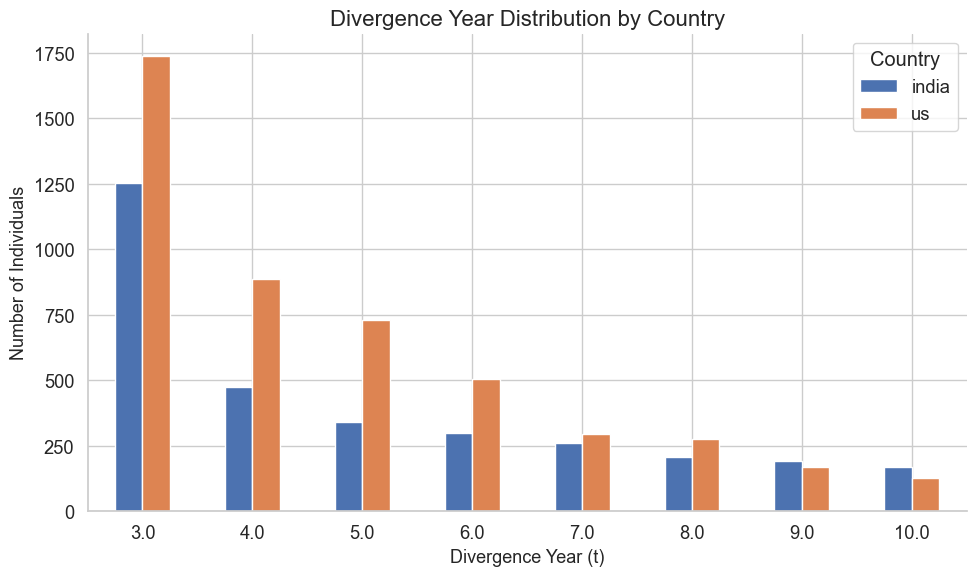

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 只保留 diverged 个体
diverged_df = df[df["diverged"] == 1].copy()

# 分国家计数
vc_divergence = diverged_df.groupby("country")["divergence_year"].value_counts().unstack().fillna(0).T

# 设置画布
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 6))

# 绘图（堆叠或并排任选）
vc_divergence.plot(kind="bar", ax=ax, color=["#4C72B0", "#DD8452"])

# 设置标题与标签
ax.set_title("Divergence Year Distribution by Country", fontsize=16)
ax.set_xlabel("Divergence Year (t)", fontsize=13)
ax.set_ylabel("Number of Individuals", fontsize=13)
plt.xticks(rotation=0)
plt.legend(title="Country")
sns.despine()
plt.tight_layout()
plt.show()


Prefix Rarity Score 分布 KDE 对比

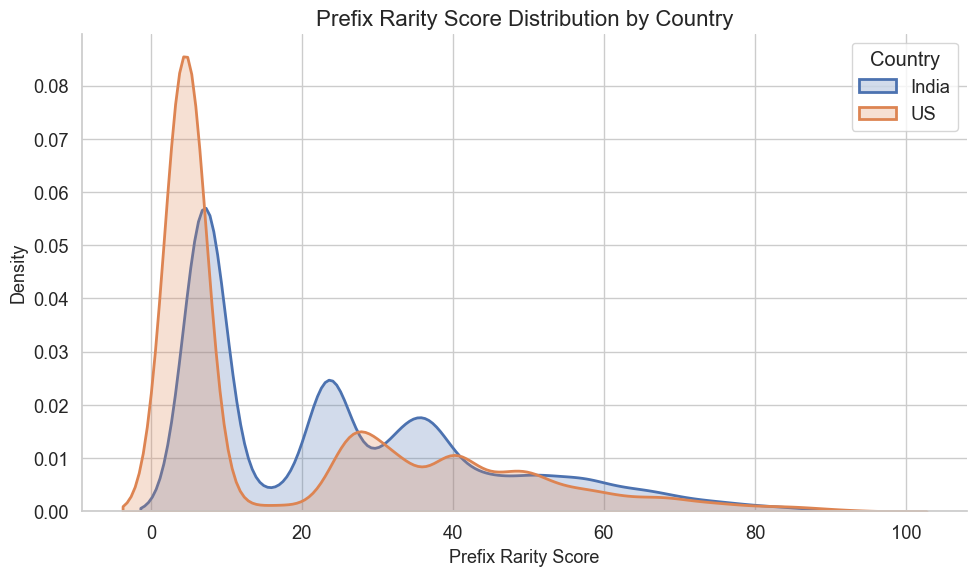

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(india_df["prefix_rarity_score"], label="India", fill=True, color="#4C72B0", linewidth=2)
sns.kdeplot(us_df["prefix_rarity_score"], label="US", fill=True, color="#DD8452", linewidth=2)

plt.title("Prefix Rarity Score Distribution by Country", fontsize=16)
plt.xlabel("Prefix Rarity Score", fontsize=13)
plt.ylabel("Density", fontsize=13)
plt.legend(title="Country")
sns.despine()
plt.tight_layout()
plt.show()


Path Uniqueness 箱线图 + Strip（展示极端个体）

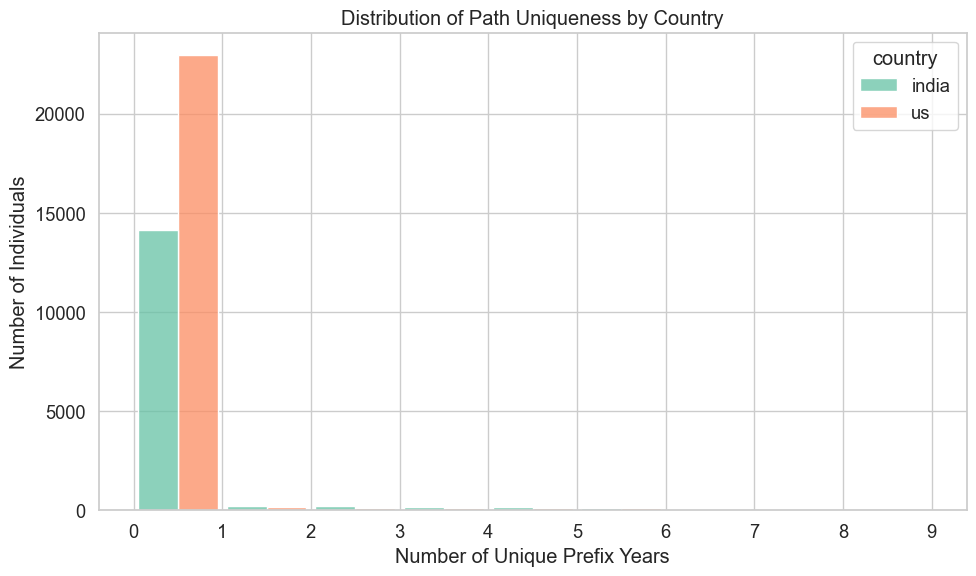

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="path_uniqueness", hue="country", multiple="dodge", binwidth=1, shrink=0.9, palette="Set2")

plt.title("Distribution of Path Uniqueness by Country")
plt.xlabel("Number of Unique Prefix Years")
plt.ylabel("Number of Individuals")
plt.xticks(range(0, df["path_uniqueness"].max() + 1))
plt.tight_layout()
plt.show()


In [19]:
df.to_csv('df.csv', index=False)

# TODO: 怎么数据集突然少了这么多？

In [20]:
import pandas as pd
import statsmodels.formula.api as smf

# 文件路径
df_main = pd.read_csv("df.csv")  # 包含 divergence 指标
controls = pd.read_csv("/Users/lei/Library/CloudStorage/OneDrive-Nexus365/yuqi_dphil/data/occupational_segregation_paper/cleaned_data/df_final_encoded_categorical_levels.csv")

# 清理控制变量
controls = controls.drop(columns=["organization_type", "num_followers", "industry"], errors="ignore")

# 合并主表 + 控制变量
df = df_main.merge(controls, on="worker_id", how="inner")

# 清理与转换
df = df[df["country"].isin(["india", "us"])].copy()
df["gender"] = df["gender"].astype("category")
df["cohort"] = df["cohort"].astype("category")
df["country"] = df["country"].astype("category")

# 教育分类合并
df["highest_educational_degree"] = df["highest_educational_degree"].replace(
    {"PhD": "Advanced Degree", "Master": "Advanced Degree"}
)

df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,...,prefix_rarity_score,path_uniqueness,Unnamed: 0,highest_educational_degree,whether_bachelor_university_prestigious,internationalization,company_size,highest_seniority_level,work_years,simplified_company_size
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,...,7.070030,0,546965,Bachelor,False,Multinational,"1,001-5,000 employees",Senior,15.250,Large (500+ employees)
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,...,7.070030,0,80989,Bachelor,False,Local,"5,001-10,000 employees",Normal,11.500,Large (500+ employees)
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,...,7.070030,0,169758,Bachelor,False,International,11-50 employees,Normal,18.417,Small (11-50 employees)
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,...,7.070030,0,112314,Bachelor,False,Multinational,"5,001-10,000 employees",Senior,11.917,Large (500+ employees)
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,...,7.070030,0,132403,Bachelor,False,Multinational,"1,001-5,000 employees",Senior,13.083,Large (500+ employees)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32626,michelle-elder,female,us,21-30 total work years,software,software,software,software,software,software,...,26.687441,0,505016,Bachelor,True,Local,201-500 employees,Senior,25.000,Medium (51-500 employees)
32627,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,...,4.528812,0,27311,Advanced Degree,False,Local,"10,001+ employees",Normal,10.000,Large (500+ employees)
32628,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,...,4.528812,0,241774,Bachelor,False,Local,"10,001+ employees",Normal,26.750,Large (500+ employees)
32629,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,...,64.726362,3,527445,Advanced Degree,False,Local,"1,001-5,000 employees",Senior,26.000,Large (500+ employees)


回归模型函数：按国家

In [21]:
def run_country_models(df, country: str, outcomes: list):
    models = {}
    df_sub = df[df["country"] == country].copy()

    for outcome in outcomes:
        try:
            # 判断是否是二元变量
            is_binary = df_sub[outcome].dropna().isin([0, 1]).all()
            model_fn = smf.logit if is_binary else smf.ols

            # 回归公式
            formula = f"""{outcome} ~ C(gender) + work_years 
                          + C(gender) * work_years 
                          + C(gender) * C(highest_educational_degree, Treatment(reference='Bachelor')) 
                          + C(gender) * C(whether_bachelor_university_prestigious, Treatment(reference=False)) 
                          + C(highest_educational_degree, Treatment(reference='Bachelor')) 
                          + C(whether_bachelor_university_prestigious, Treatment(reference=False)) 
                          + C(internationalization, Treatment(reference='Local')) 
                          + C(simplified_company_size, Treatment(reference='Micro (0-10 employees)')) 
                          + C(highest_seniority_level, Treatment(reference='Assistant/Junior'))"""

            # 拟合模型
            model = model_fn(formula, data=df_sub).fit(disp=False)
            print(f"\n✅ [{country.upper()}] Fitted {outcome} model.")
            models[outcome] = model

        except Exception as e:
            print(f"\n❌ [{country.upper()}] Error fitting {outcome}: {e}")

    return models


In [22]:
outcomes = ["diverged", "divergence_year", "prefix_rarity_score", "path_uniqueness"]

models_india = run_country_models(df, "india", outcomes)
models_us = run_country_models(df, "us", outcomes)



✅ [INDIA] Fitted diverged model.

✅ [INDIA] Fitted divergence_year model.

✅ [INDIA] Fitted prefix_rarity_score model.

✅ [INDIA] Fitted path_uniqueness model.

✅ [US] Fitted diverged model.

✅ [US] Fitted divergence_year model.

✅ [US] Fitted prefix_rarity_score model.

✅ [US] Fitted path_uniqueness model.


模型结果整理函数（coef + p-value）
这个函数可以提取各模型的系数和 p 值，并加入国家标签，方便后续合并与可视化。

In [23]:
def extract_model_summary(model_dict, country_name):
    summary_rows = []

    for outcome, model in model_dict.items():
        for param, coef in model.params.items():
            pval = model.pvalues[param]
            summary_rows.append({
                "country": country_name,
                "outcome": outcome,
                "term": param,
                "coef": coef,
                "pval": pval
            })

    return pd.DataFrame(summary_rows)


In [25]:
import pandas as pd

def extract_model_summary(models_dict, country_label):
    rows = []
    for outcome, model in models_dict.items():
        summary = model.summary2().tables[1].reset_index()
        summary = summary.rename(columns={'index': 'term'})
        summary['outcome'] = outcome
        summary['country'] = country_label
        rows.append(summary)
    return pd.concat(rows, ignore_index=True)

# 提取每个国家的结果
results_india = extract_model_summary(models_india, "India")
results_us = extract_model_summary(models_us, "US")

# 合并
results_all = pd.concat([results_india, results_us], ignore_index=True)

results_all

,term,Coef.,Std.Err.,z,P>|z|,[0.025,0.975],outcome,country,t,P>|t|
0,Intercept,-3.687866,0.482274,-7.646829,2.059952e-14,-4.633106,-2.742627,diverged,India,NaN,NaN
1,C(gender)[T.male],0.143606,0.291081,0.493356,6.217611e-01,-0.426901,0.714114,diverged,India,NaN,NaN
2,"C(highest_educational_degree, Treatment(refere...",0.179433,0.120907,1.484063,1.377923e-01,-0.057540,0.416405,diverged,India,NaN,NaN
3,"C(whether_bachelor_university_prestigious, Tre...",-0.114280,0.150913,-0.757256,4.488964e-01,-0.410063,0.181504,diverged,India,NaN,NaN
4,"C(internationalization, Treatment(reference='L...",-0.060289,0.080926,-0.744987,4.562796e-01,-0.218902,0.098324,diverged,India,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
131,"C(highest_seniority_level, Treatment(reference...",-0.016425,0.094148,NaN,NaN,-0.200963,0.168112,path_uniqueness,US,-0.174464,8.615024e-01
132,C(gender)[T.male]:C(highest_educational_degree...,-0.003108,0.029396,NaN,NaN,-0.060728,0.054511,path_uniqueness,US,-0.105736,9.157932e-01
133,C(gender)[T.male]:C(whether_bachelor_universit...,0.016608,0.032373,NaN,NaN,-0.046846,0.080062,path_uniqueness,US,0.513024,6.079399e-01
134,work_years,-0.007900,0.001492,NaN,NaN,-0.010825,-0.004976,path_uniqueness,US,-5.295189,1.201602e-07


In [26]:
# 添加显著性星号
def format_significance(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    elif p < 0.1:
        return '.'
    else:
        return ''

results_all['signif'] = results_all['P>|z|'].apply(format_significance)
results_all['term_label'] = results_all['term'] + results_all['signif']

# 只保留有意义的变量（避免截距或技术变量）
selected_terms = results_all[~results_all['term'].str.contains('Intercept', na=False)].copy()

selected_terms

,term,Coef.,Std.Err.,z,P>|z|,[0.025,0.975],outcome,country,t,P>|t|,signif,term_label
1,C(gender)[T.male],0.143606,0.291081,0.493356,0.621761,-0.426901,0.714114,diverged,India,NaN,NaN,,C(gender)[T.male]
2,"C(highest_educational_degree, Treatment(refere...",0.179433,0.120907,1.484063,0.137792,-0.057540,0.416405,diverged,India,NaN,NaN,,"C(highest_educational_degree, Treatment(refere..."
3,"C(whether_bachelor_university_prestigious, Tre...",-0.114280,0.150913,-0.757256,0.448896,-0.410063,0.181504,diverged,India,NaN,NaN,,"C(whether_bachelor_university_prestigious, Tre..."
4,"C(internationalization, Treatment(reference='L...",-0.060289,0.080926,-0.744987,0.456280,-0.218902,0.098324,diverged,India,NaN,NaN,,"C(internationalization, Treatment(reference='L..."
5,"C(internationalization, Treatment(reference='L...",-0.092159,0.062627,-1.471541,0.141145,-0.214906,0.030589,diverged,India,NaN,NaN,,"C(internationalization, Treatment(reference='L..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,"C(highest_seniority_level, Treatment(reference...",-0.016425,0.094148,NaN,NaN,-0.200963,0.168112,path_uniqueness,US,-0.174464,8.615024e-01,,"C(highest_seniority_level, Treatment(reference..."
132,C(gender)[T.male]:C(highest_educational_degree...,-0.003108,0.029396,NaN,NaN,-0.060728,0.054511,path_uniqueness,US,-0.105736,9.157932e-01,,C(gender)[T.male]:C(highest_educational_degree...
133,C(gender)[T.male]:C(whether_bachelor_universit...,0.016608,0.032373,NaN,NaN,-0.046846,0.080062,path_uniqueness,US,0.513024,6.079399e-01,,C(gender)[T.male]:C(whether_bachelor_universit...
134,work_years,-0.007900,0.001492,NaN,NaN,-0.010825,-0.004976,path_uniqueness,US,-5.295189,1.201602e-07,,work_years


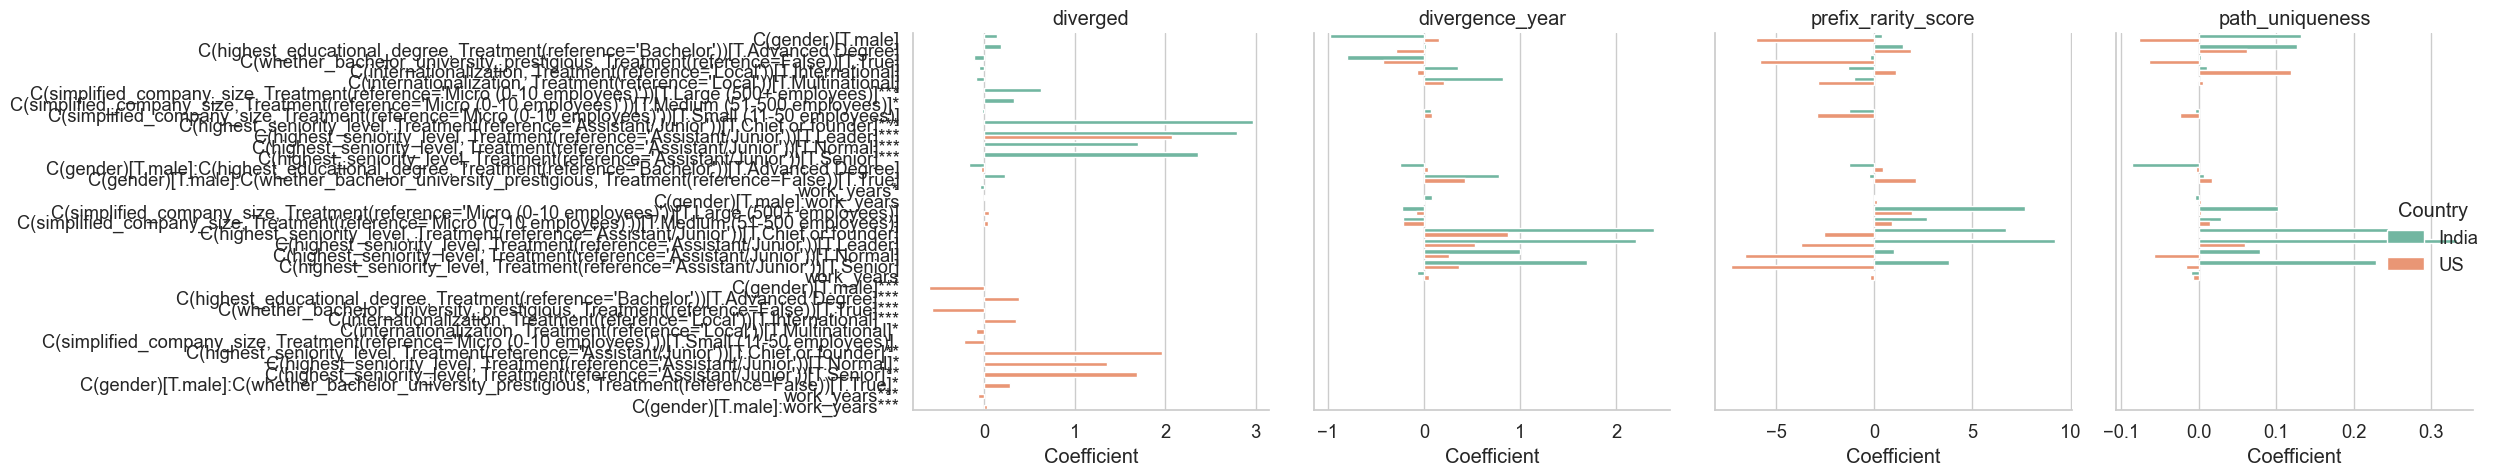

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置风格
sns.set(style="whitegrid", font_scale=1.2)

# 创建 FacetGrid 分面图：col=outcome，x=coef，y=term
g = sns.catplot(
    data=selected_terms,
    x="Coef.",
    y="term_label",
    hue="country",
    col="outcome",
    kind="bar",
    palette="Set2",
    sharex=False,
    height=5,
    aspect=1.2
)

g.set_titles("{col_name}")
g.set_axis_labels("Coefficient", "")
g._legend.set_title("Country")

# 显示
plt.tight_layout()
plt.show()


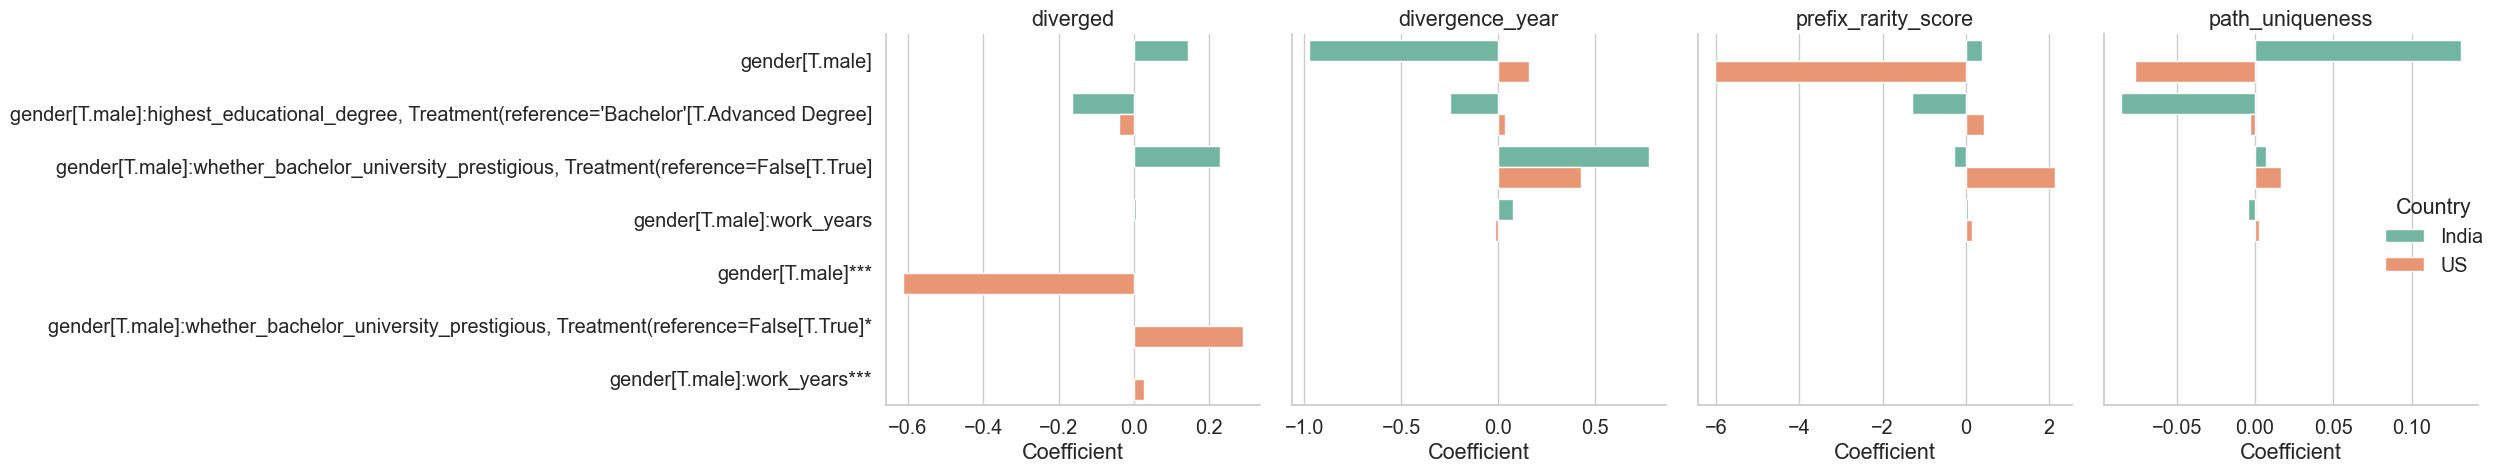

In [28]:
# 仅保留性别主效应和交互项
gender_terms = selected_terms[selected_terms["term"].str.contains("gender")].copy()

# 清理 label 方便阅读
gender_terms["term_label"] = gender_terms["term"].str.replace("C\\(|\\)", "", regex=True) + gender_terms["signif"]

# 可视化
sns.set(style="whitegrid", font_scale=1.3)
g = sns.catplot(
    data=gender_terms,
    x="Coef.",
    y="term_label",
    hue="country",
    col="outcome",
    kind="bar",
    palette="Set2",
    sharex=False,
    height=5,
    aspect=1.2
)
g.set_titles("{col_name}")
g.set_axis_labels("Coefficient", "")
g._legend.set_title("Country")
plt.tight_layout()
plt.show()


divergence - seniority level

In [29]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
import patsy
import pandas as pd

# 👉 设置有序因变量
seniority_order = ["Assistant/Junior", "Normal", "Senior", "Leader", "Chief or founder"]
df["highest_seniority_level"] = pd.Categorical(
    df["highest_seniority_level"], categories=seniority_order, ordered=True
)

# 👉 按国家分别拟合模型
def run_ordered_model_by_country(df, country):
    print(f"\n📌 Running OrderedModel for {country.upper()}")

    df_sub = df[
        (df["country"] == country) & 
        df["highest_seniority_level"].notna() & 
        df["diverged"].notna()
    ].copy()

    # 清理缺失值
    required_cols = ["highest_seniority_level", "diverged", "gender", "work_years",
                     "highest_educational_degree", "whether_bachelor_university_prestigious",
                     "internationalization", "simplified_company_size"]
    df_sub = df_sub.dropna(subset=required_cols)

    # 构建设计矩阵
    formula = """diverged 
                 + C(gender) 
                 + work_years 
                 + C(gender) * work_years 
                 + C(gender) * C(highest_educational_degree, Treatment(reference='Bachelor')) 
                 + C(gender) * C(whether_bachelor_university_prestigious, Treatment(reference=False)) 
                 + C(highest_educational_degree, Treatment(reference='Bachelor')) 
                 + C(whether_bachelor_university_prestigious, Treatment(reference=False)) 
                 + C(internationalization, Treatment(reference='Local')) 
                 + C(simplified_company_size, Treatment(reference='Micro (0-10 employees)'))"""

    X = patsy.dmatrix(formula, data=df_sub, return_type="dataframe")
    X = X.loc[:, ~X.columns.str.contains('Intercept')]  # 移除拦截项

    y = df_sub["highest_seniority_level"]
    model = OrderedModel(endog=y, exog=X, distr='logit')
    result = model.fit(method='bfgs', disp=False)

    return result

# 👉 执行
result_india = run_ordered_model_by_country(df, "india")
result_us = run_ordered_model_by_country(df, "us")

# 👉 打印摘要
print("\n🇮🇳 INDIA MODEL SUMMARY:")
print(result_india.summary())

print("\n🇺🇸 US MODEL SUMMARY:")
print(result_us.summary())



📌 Running OrderedModel for INDIA

📌 Running OrderedModel for US

🇮🇳 INDIA MODEL SUMMARY:
                                OrderedModel Results                               
Dep. Variable:     highest_seniority_level   Log-Likelihood:                -15031.
Model:                        OrderedModel   AIC:                         3.010e+04
Method:                 Maximum Likelihood   BIC:                         3.022e+04
Date:                     Sat, 03 May 2025                                         
Time:                             00:10:53                                         
No. Observations:                    12784                                         
Df Residuals:                        12767                                         
Df Model:                               13                                         
                                                                                                             coef    std err          z      P>|z|      [0

可视化预测概率（predict()）：看看 diverged=1 vs 0 对应的 seniority 分布有多大区别

In [35]:
import pandas as pd
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.miscmodels.ordinal_model import OrderedModel

# 准备数据（只保留我们需要的列，过滤空值）
seniority_order = ["Assistant/Junior", "Normal", "Senior", "Leader", "Chief or founder"]
df["highest_seniority_level"] = pd.Categorical(
    df["highest_seniority_level"], categories=seniority_order, ordered=True
)

df_clean = df.dropna(subset=[
    "highest_seniority_level", "diverged", "gender", "work_years",
    "highest_educational_degree", "whether_bachelor_university_prestigious",
    "internationalization", "simplified_company_size"
])

# 拆分国家
df_clean_india = df_clean[df_clean["country"] == "india"].copy()
df_clean_us = df_clean[df_clean["country"] == "us"].copy()

# 设置公式
formula = """diverged 
             + C(gender) 
             + work_years 
             + C(gender) * work_years 
             + C(gender) * C(highest_educational_degree, Treatment(reference='Bachelor')) 
             + C(gender) * C(whether_bachelor_university_prestigious, Treatment(reference=False)) 
             + C(highest_educational_degree, Treatment(reference='Bachelor')) 
             + C(whether_bachelor_university_prestigious, Treatment(reference=False)) 
             + C(internationalization, Treatment(reference='Local')) 
             + C(simplified_company_size, Treatment(reference='Micro (0-10 employees)'))"""

# 构造设计矩阵 & 拟合模型（India）
X_india = patsy.dmatrix(formula, data=df_clean_india, return_type="dataframe")
X_india = X_india.loc[:, ~X_india.columns.str.contains("Intercept")]
model_india = OrderedModel(df_clean_india["highest_seniority_level"], X_india, distr="logit")
result_india = model_india.fit(method="bfgs")

# 构造设计矩阵 & 拟合模型（US）
X_us = patsy.dmatrix(formula, data=df_clean_us, return_type="dataframe")
X_us = X_us.loc[:, ~X_us.columns.str.contains("Intercept")]
model_us = OrderedModel(df_clean_us["highest_seniority_level"], X_us, distr="logit")
result_us = model_us.fit(method="bfgs")


Optimization terminated successfully.
         Current function value: 1.175763
         Iterations: 91
         Function evaluations: 93
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 1.166130
         Iterations: 77
         Function evaluations: 80
         Gradient evaluations: 80


In [36]:
def plot_predicted_seniority_by_divergence(model, df_clean, country_name):
    # 获取 patsy 的 design_info
    design_info = model.model.exog.design_info

    # Diverged = 0
    df_0 = df_clean.copy()
    df_0["diverged"] = 0
    X0 = patsy.build_design_matrices([design_info], df_0)[0]
    pred0 = model.predict(X0)

    # Diverged = 1
    df_1 = df_clean.copy()
    df_1["diverged"] = 1
    X1 = patsy.build_design_matrices([design_info], df_1)[0]
    pred1 = model.predict(X1)

    # 平均概率
    mean_probs_0 = pred0.mean(axis=0)
    mean_probs_1 = pred1.mean(axis=0)
    levels = model.model.endog.categories

    # 组合数据
    probs_df = pd.DataFrame({
        "Seniority": levels,
        "Diverged = 0": mean_probs_0,
        "Diverged = 1": mean_probs_1
    }).melt(id_vars="Seniority", var_name="Divergence", value_name="Probability")

    # 可视化
    plt.figure(figsize=(10, 6))
    sns.barplot(data=probs_df, x="Seniority", y="Probability", hue="Divergence", palette="Set2")
    plt.title(f"📊 Predicted Seniority Distribution by Divergence ({country_name})", fontsize=14)
    plt.ylabel("Predicted Probability")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


In [37]:
plot_predicted_seniority_by_divergence(result_india, df_clean_india, "India")
plot_predicted_seniority_by_divergence(result_us, df_clean_us, "US")


AttributeError: 'numpy.ndarray' object has no attribute 'design_info'